In [1]:
import os

directory = r"Y:\UGent\BioLizard - General\data\methylome"
os.chdir(directory)
print(os.getcwd())

Y:\UGent\BioLizard - General\data\methylome


In [2]:
import pandas as pd 
import numpy as np
import sklearn as sk
import cupy as cp

In [3]:
data=pd.read_csv("Y:/meta_data.csv")
meta_data=pd.DataFrame(data).reset_index(drop=True)
data = data.drop(data.columns[0], axis=1)

In [4]:
meta_data.head()

,Unnamed: 0,idBiospe,idwoman,cpn234_tad2,cpn234_tas2,cpn234_tad3,cpn234_tas3,cpn234_tad4,cpn234_tas4,cpn234_tad5,...,c_igu_muacaz6,c_igu_bmi9,c_igu_hcaz9,c_igu_muacaz9,c_igu_bmi12,c_igu_hcaz12,c_igu_muacaz12,biospe_neonatal_mortality,last_visit_death,_list_tad
0,1,101,40262,6.0,9.0,5.0,12.0,7.0,12.0,NaN,...,0.08,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
1,2,102,16016_2,8.0,12.0,8.0,12.0,8.0,14.0,NaN,...,-1.20,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
2,3,103,40274,6.0,10.0,7.0,10.0,6.0,11.0,NaN,...,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
3,4,104,16025_3,6.0,10.0,7.0,11.0,6.0,11.0,NaN,...,0.09,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3
4,5,105,40254,5.0,10.0,6.0,10.0,6.0,11.0,NaN,...,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,0,.,3


In [5]:
column_list = meta_data.columns.tolist()
print(column_list)

['Unnamed: 0', 'idBiospe', 'idwoman', 'cpn234_tad2', 'cpn234_tas2', 'cpn234_tad3', 'cpn234_tas3', 'cpn234_tad4', 'cpn234_tas4', 'cpn234_tad5', 'cpn234_tas5', 'incl_diabetes', 'cpn1_tad', 'cpn1_tas', 'env', 'treatment1', 'treatment1_prenatal_n', 'treatment2', 'treatment2_postnatal_n', 'code', 'code_bep_n', 'lengthzscore', 'lengthcentile', 'weightzscore', 'weightcentile', 'headcircumferencezscore', 'headcircumferencecentile', 'date_monthly1', 'mddw_10_1', 'date_monthly2', 'mddw_10_2', 'date_monthly3', 'mddw_10_3', 'date_monthly4', 'mddw_10_4', 'date_monthly5', 'mddw_10_5', 'date_monthly6', 'mddw_10_6', 'date_monthly7', 'mddw_10_7', 'date_monthly8', 'mddw_10_8', 'date_monthly9', 'mddw_10_9', 'date_monthly10', 'mddw_10_10', 'age_nearest0', 'fu_doi0', 'c_age0', 'c_weight0', 'c_muac0', 'c_hc0', 'c_height0', 'c_haz0', 'c_waz0', 'c_whz0', 'bmiz060', 'c_stunting0', 'c_underweight0', 'c_wasting0', 'c_muac_cat0', 'age_nearest1', 'fu_doi1', 'c_age1', 'c_weight1', 'c_muac1', 'c_hc1', 'c_height1', '

In [6]:
meta_data.shape

(309, 451)

In [7]:
import pandas as pd
import multiprocessing

num_cores = multiprocessing.cpu_count() - 1

meta_data_methylome = pd.read_csv("../../data/methylome/sampleSheet.csv")
methylome = pd.read_csv("../../data/methylome/20240326MethylomeDataBetas.csv")

#Transform the data/ Based on R script
methylome['idProbe'] = 'probe' + (methylome.index + 1).astype(str)
methylome.set_index('idProbe', inplace=True)
methylome = methylome.T.reset_index().rename(columns={'index': 'idProbe'})
methylome = methylome.merge(meta_data_methylome[['Basename', 'Sample_ID']], left_on='idProbe', right_on='Basename', how='left')
methylome.drop('Basename', axis=1, inplace=True)
methylome.rename(columns={'Sample_ID': 'idBiospe'}, inplace=True)
methylome = methylome[['idBiospe'] + [col for col in methylome.columns if col != 'idBiospe']]
methylome = methylome.merge(meta_data[['idBiospe', 'treatment1_prenatal_n']], on='idBiospe', how='left')
methylome.rename(columns={'treatment1_prenatal_n': 'class'}, inplace=True)
methylome['timePoint'] = 'acco'
methylome.sort_values(by=['timePoint', 'idBiospe'], inplace=True)
methylome = methylome[['timePoint', 'idBiospe', 'class'] + [col for col in methylome.columns if col not in ['timePoint', 'idBiospe', 'class']]]


In [8]:
methylome.head()

,timePoint,idBiospe,class,idProbe,probe1,probe2,probe3,probe4,probe5,probe6,...,probe865850,probe865851,probe865852,probe865853,probe865854,probe865855,probe865856,probe865857,probe865858,probe865859
0,acco,102,1,206402350107_R04C01,0.370702,0.906810,0.729572,0.919086,0.748790,0.131226,...,NaN,NaN,0.204499,0.233191,0.410137,0.116070,0.238445,NaN,0.806420,0.415945
1,acco,103,1,206644410180_R03C01,0.352146,0.475196,0.227495,0.772063,0.737550,0.225267,...,0.741882,0.607857,0.247206,0.637003,0.849188,0.504236,0.440615,0.823711,0.777729,0.567635
2,acco,104,0,206402350116_R03C01,0.307659,0.872990,0.657483,0.819911,0.548639,0.126281,...,0.227705,0.235356,0.231018,0.234811,0.420113,0.139597,0.223410,0.199689,0.807111,0.493500
3,acco,106,0,206425830038_R07C01,0.369779,0.875169,0.725316,0.909891,0.587720,0.091899,...,0.815071,0.513299,0.249403,0.745385,0.924718,0.591618,0.713801,0.852716,0.782532,0.491458
4,acco,107,0,206644410103_R02C01,0.325455,0.826068,0.612782,0.738983,0.641742,0.245444,...,NaN,NaN,0.261898,0.229423,0.438345,0.211108,NaN,NaN,0.815358,0.434790


In [9]:
methylome = methylome.drop("idProbe", axis=1)

In [10]:
methylome=methylome.drop("idBiospe", axis=1)
methylome = methylome.drop("timePoint", axis=1)

In [11]:
methylome.head()

,class,probe1,probe2,probe3,probe4,probe5,probe6,probe7,probe8,probe9,...,probe865850,probe865851,probe865852,probe865853,probe865854,probe865855,probe865856,probe865857,probe865858,probe865859
0,1,0.370702,0.906810,0.729572,0.919086,0.748790,0.131226,0.131664,0.672684,0.675035,...,NaN,NaN,0.204499,0.233191,0.410137,0.116070,0.238445,NaN,0.806420,0.415945
1,1,0.352146,0.475196,0.227495,0.772063,0.737550,0.225267,0.213943,0.688005,0.659342,...,0.741882,0.607857,0.247206,0.637003,0.849188,0.504236,0.440615,0.823711,0.777729,0.567635
2,0,0.307659,0.872990,0.657483,0.819911,0.548639,0.126281,0.118666,0.791500,0.813271,...,0.227705,0.235356,0.231018,0.234811,0.420113,0.139597,0.223410,0.199689,0.807111,0.493500
3,0,0.369779,0.875169,0.725316,0.909891,0.587720,0.091899,0.120725,0.561473,0.782631,...,0.815071,0.513299,0.249403,0.745385,0.924718,0.591618,0.713801,0.852716,0.782532,0.491458
4,0,0.325455,0.826068,0.612782,0.738983,0.641742,0.245444,0.265556,0.743723,0.654437,...,NaN,NaN,0.261898,0.229423,0.438345,0.211108,NaN,NaN,0.815358,0.434790


In [64]:
methylome_new=methylome.iloc[:,0:35000]

In [65]:
methylome_new.head()

,class,probe1,probe2,probe3,probe4,probe5,probe6,probe7,probe8,probe9,...,probe34990,probe34991,probe34992,probe34993,probe34994,probe34995,probe34996,probe34997,probe34998,probe34999
0,1,0.370702,0.906810,0.729572,0.919086,0.748790,0.131226,0.131664,0.672684,0.675035,...,0.460804,0.821492,0.892341,0.853054,0.823748,0.704705,0.895216,0.401724,0.332923,0.629534
1,1,0.352146,0.475196,0.227495,0.772063,0.737550,0.225267,0.213943,0.688005,0.659342,...,0.404890,0.825345,0.915651,0.854478,0.841205,0.589583,0.897055,0.363201,0.355338,0.478019
2,0,0.307659,0.872990,0.657483,0.819911,0.548639,0.126281,0.118666,0.791500,0.813271,...,0.385727,0.801814,0.898570,0.787488,0.824746,0.702705,0.866606,0.388325,0.278387,0.581088
3,0,0.369779,0.875169,0.725316,0.909891,0.587720,0.091899,0.120725,0.561473,0.782631,...,0.291143,0.848688,0.879540,0.849853,0.835990,0.727481,0.866453,0.449962,0.334397,0.648008
4,0,0.325455,0.826068,0.612782,0.738983,0.641742,0.245444,0.265556,0.743723,0.654437,...,0.505894,0.831708,0.872691,0.837152,0.851418,0.758169,0.890204,0.448338,0.347007,0.687748


In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# feature/target split
X = methylome_new.drop('class', axis=1)
y = methylome_new['class']

# Re-encode 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

# param tuning
params = {
    'tree_method': 'gpu_hist',  # GPU algorithm
    'predictor': 'gpu_predictor',  # GPU for prediction
    'device': 'cuda',  # Use CUDA
    'max_depth':7,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 2,
    'eval_metric' : 'logloss', 
    'gamma': 0.01
}

number_of_rounds= 69
cval_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=number_of_rounds,
    nfold=5,
    metrics={'mlogloss'},
    early_stopping_rounds=10
)

model = xgb.train(params, dtrain, num_boost_round=number_of_rounds)

c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling

In [44]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(44, 13999)
(44,)
(175, 13999)
(175,)


In [45]:
y_pred = model.predict(dtest)
print(y_pred)

[0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6363636363636364


In [47]:
cval_results

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.473168,0.003287,0.707821,0.052427


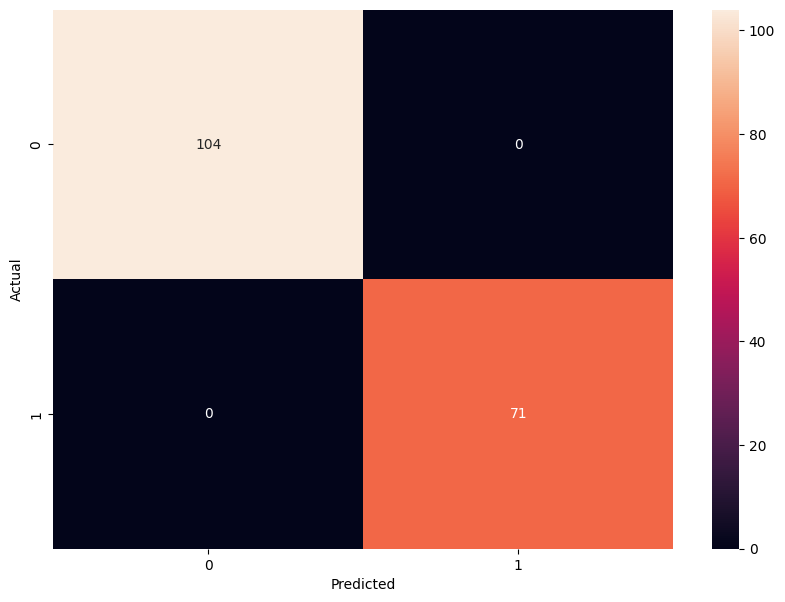

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict train set
y_train_pred_classes = model.predict(dtrain)

cm = confusion_matrix(y_train, y_train_pred_classes)

# Plot 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


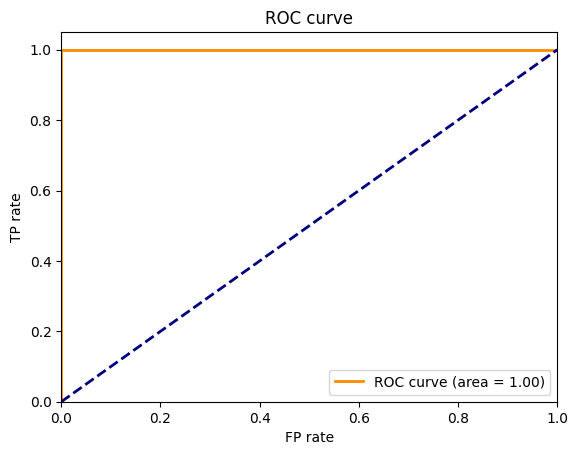

In [54]:
from sklearn.metrics import roc_curve, auc

# ROC & AUC
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


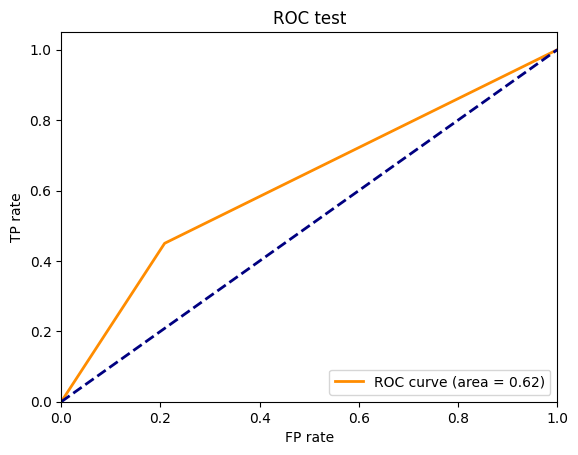

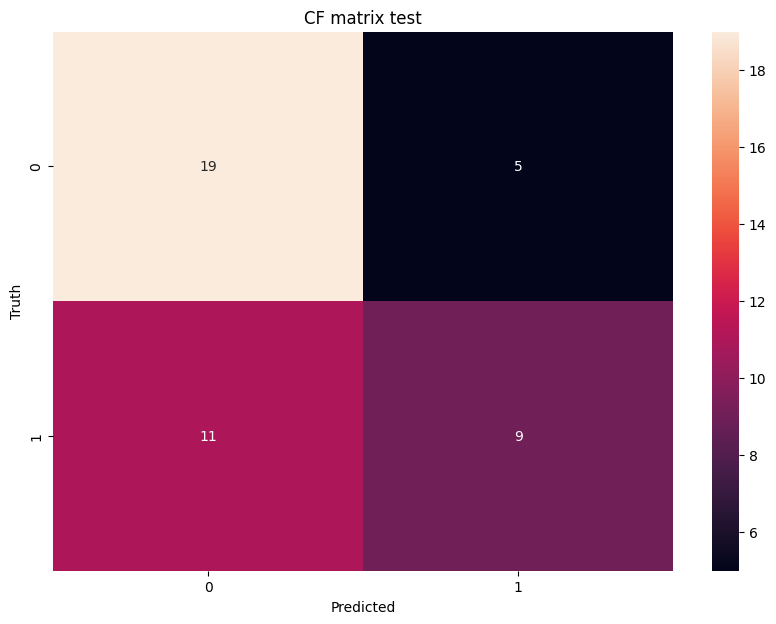

In [63]:
# ROC & AUC test
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC test
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC test')
plt.legend(loc="lower right")
plt.show()

# CF matrix for test
cm_test = confusion_matrix(y_test, y_pred.round())

# Plot tets
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('CF matrix test')
plt.show()
